<a href="https://colab.research.google.com/github/sergio-cabrales/python/blob/main/StockPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use ('fivethirtyeight')

In [ ]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo',start='2010-01-01', end='2021-03-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.583586
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.594968
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.490066
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.478067
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.521136
...,...,...,...,...,...,...
2021-02-23,126.709999,118.389999,123.760002,125.860001,158273000.0,125.860001
2021-02-24,125.559998,122.230003,124.940002,125.349998,111039900.0,125.349998
2021-02-25,126.459999,120.540001,124.680000,120.989998,148199500.0,120.989998


In [ ]:
# Num rows and colums
df.shape

(2808, 6)

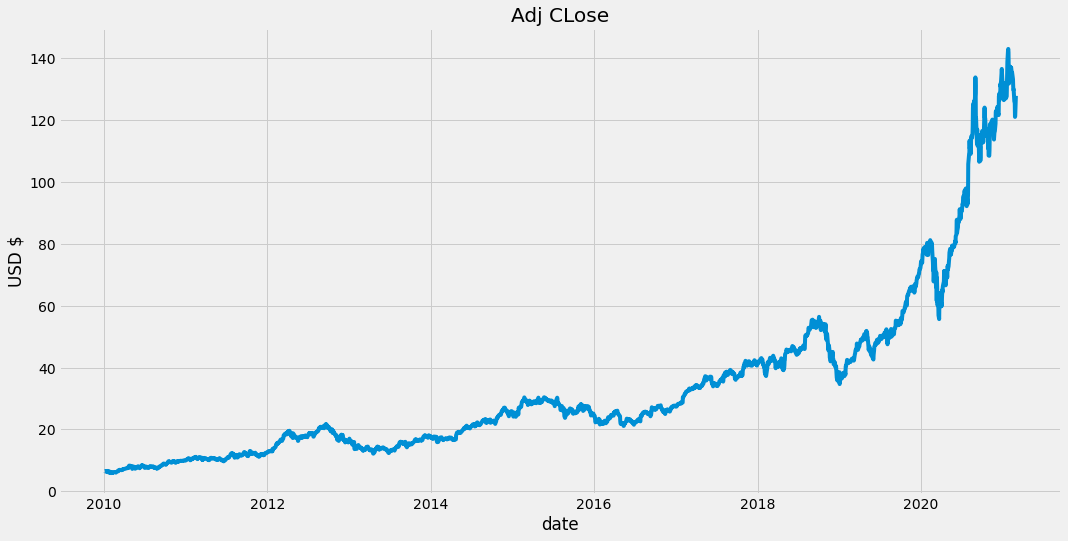

In [ ]:
plt.figure(figsize=(16,8))
plt.title ('Adj CLose')
plt.plot(df['Adj Close'])
plt.xlabel('date')
plt.ylabel('USD $')
plt.show()

In [ ]:
# creat a new dataframe
data = df.filter(['Adj Close'])
# numpy array
dataset = data.values

training_len = math.ceil(len(dataset)*0.8)

training_len

2247

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00492968],
       [0.00501273],
       [0.00424724],
       ...,
       [0.83977919],
       [0.84174947],
       [0.88940035]])

In [ ]:
# Create trainig data set
train_data = scaled_data[0:training_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([4.92967610e-03, 5.01273389e-03, 4.24723827e-03, 4.15968486e-03,
       4.47396480e-03, 4.05418373e-03, 3.51766941e-03, 4.17539868e-03,
       3.90153069e-03, 3.11583258e-03, 5.16088782e-03, 4.41785295e-03,
       3.59623504e-03, 1.27956310e-03, 2.47381365e-03, 3.11809083e-03,
       3.55358572e-03, 1.62527417e-03, 2.23389600e-06, 6.01617422e-04,
       8.55289884e-04, 1.61179424e-03, 0.00000000e+00, 7.65492136e-04,
       4.64674726e-04, 9.29352931e-04, 6.89149958e-04, 1.48608366e-03,
       1.86995537e-03, 2.54790105e-03, 2.35708041e-03, 2.44238252e-03,
       2.15952675e-03, 1.87892227e-03, 1.12466573e-03, 1.93281066e-03,
       2.23362807e-03, 2.82176209e-03, 3.80276952e-03, 3.77133143e-03,
       3.87907690e-03, 4.18886469e-03, 6.03862105e-03, 6.06781480e-03,
       6.95228103e-03, 7.36082651e-03, 7.50899088e-03, 7.75593034e-03,
       7.13635476e-03, 7.27328702e-03, 7.19921701e-03, 7.31818067e-03,
       6.77942898e-03, 7.34063098e-03, 8.15102025e-03, 8.37775026e-03,
     

In [ ]:
# x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# reshape tha data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(2187, 60, 1)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Trian the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2187/2187 [==============================] - 60s 26ms/step - loss: 6.2857e-04


In [ ]:
# Create the tsting data set
test_data = scaled_data[training_len - 60: , :]

x_test =[]
y_test = dataset[training_len:,:]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [ ]:
#Get the model predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Get the roor mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

4.298225230377363

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


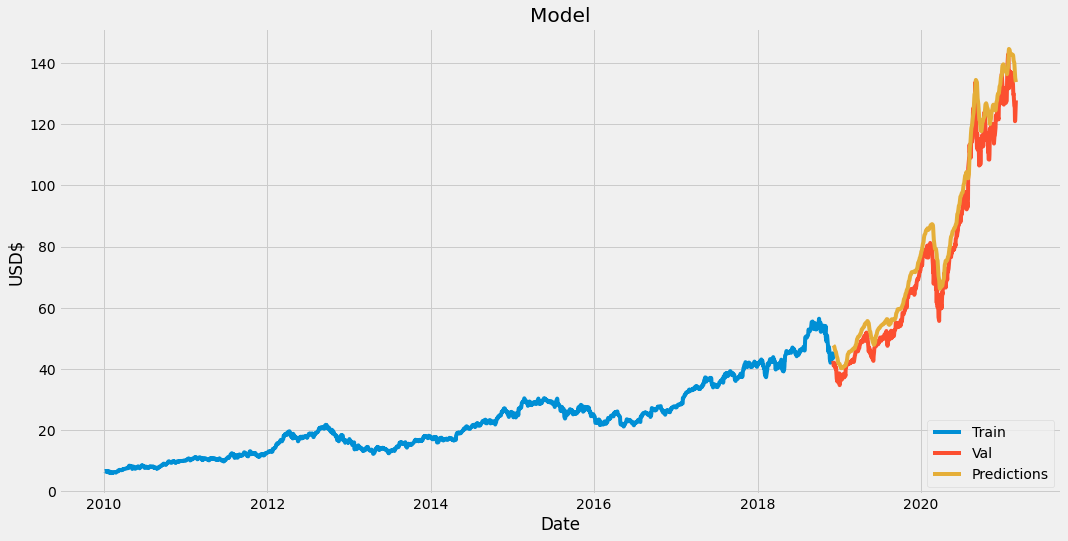

In [ ]:
# Plot the data
train =data[:training_len]
valid = data[training_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('USD$')
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']])
plt.legend(['Train', 'Val','Predictions'], loc='lower right')
plt.show()


In [ ]:
# Show prices
valid

,Adj Close,Predictions
Date,,
2018-12-06,42.601311,47.693752
2018-12-07,41.082272,47.589348
2018-12-10,41.352917,47.274185
2018-12-11,41.116405,46.909149
2018-12-12,41.231007,46.524281
...,...,...
2021-02-23,125.860001,138.875061
2021-02-24,125.349998,137.712646
2021-02-25,120.989998,136.605591


In [ ]:
# Get the qoute
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2010-01-01', end='2021-03-01')
# new data frame
new_df = apple_quote.filter(['Adj Close'])
# last 60 days
last_60_days = new_df[-60:].values

last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[133.30011]]


In [ ]:
# Get the qoute
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2021-03-02', end='2021-03-02')
print(apple_quote2['Adj Close'])

Date
2021-03-02    125.120003
Name: Adj Close, dtype: float64
